In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pip install --upgrade xgboost

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = 'https://raw.githubusercontent.com/Dimassaputra5/DataQuest/refs/heads/main/training_dataset.csv'
data_validation = 'https://raw.githubusercontent.com/Dimassaputra5/DataQuest/refs/heads/main/validation_set.csv'
cc = pd.read_csv(data, 
                 encoding='utf-8',  # atau 'latin1', 'iso-8859-1', dll
                 sep=',')
cc_validation = pd.read_csv(data_validation, 
                 encoding='utf-8',  # atau 'latin1', 'iso-8859-1', dll
                 sep=',')
cc

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


In [3]:
cc_validation

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,...,15,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,Papua


In [4]:
cc.info()
cc_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [5]:
# cc['status_perkawinan'].unique()
# cc['status_perkawinan'] = cc['status_perkawinan'].map({'menikah': 1, 'lajang':2, 'cerai': 3, 'unknown': -2})
# cc['status_perkawinan'].unique()
# ##########################################################
# cc_validation['status_perkawinan'] = cc_validation['status_perkawinan'].map({'menikah': 1, 'lajang':2, 'cerai': 3, 'unknown': -2})


In [6]:
cc['RasioPekerjaSukuBunga'] = cc['jumlah_pekerja']/cc['suku_bunga_euribor_3bln']
###################################################
cc_validation['RasioPekerjaSukuBunga'] = cc_validation['jumlah_pekerja']/cc_validation['suku_bunga_euribor_3bln']

In [7]:
cc['gagal_bayar_sebelumnya'].unique()
cc['gagal_bayar_sebelumnya'] = cc['gagal_bayar_sebelumnya'].map({'no': 0, 'yes': 1, 'unknown': -1})
cc['gagal_bayar_sebelumnya'].unique()
###############################################
cc_validation['gagal_bayar_sebelumnya'] = cc_validation['gagal_bayar_sebelumnya'].map({'no': 0, 'yes': 1, 'unknown': -1})


In [8]:
cc['pinjaman_rumah'].unique()
cc['pinjaman_rumah'] = cc['pinjaman_rumah'].map({'no': 0, 'yes': 1, 'unknown': -1})
cc['pinjaman_rumah'].unique()
##############################################
cc_validation['pinjaman_rumah'] = cc_validation['pinjaman_rumah'].map({'no': 0, 'yes': 1, 'unknown': -1})


In [9]:
cc['pinjaman_pribadi'].unique()
cc['pinjaman_pribadi'] = cc['pinjaman_pribadi'].map({'no': 0, 'yes': 1, 'unknown': -1})
cc['pinjaman_pribadi'].unique()
################################################
cc_validation['pinjaman_pribadi'] = cc_validation['pinjaman_pribadi'].map({'no': 0, 'yes': 1, 'unknown': -1})


In [10]:
cc['jenis_kontak'].unique()
cc['jenis_kontak'] = cc['jenis_kontak'].map({'cellular': 0, 'telephone': 1})
##########################################################
cc_validation['jenis_kontak'] = cc_validation['jenis_kontak'].map({'cellular': 0, 'telephone': 1})
cc['jenis_kontak'].unique() 

array([0, 1])

In [11]:
cc['bulan_kontak_terakhir'].unique()
cc['bulan_kontak_terakhir'] = cc['bulan_kontak_terakhir'].map({
    'jul': 7, 'nov': 11, 'may': 5, 'aug': 8, 'oct': 10, 'apr': 4, 'jun': 6, 'sep': 9, 'mar': 3, 'dec':12
}).astype(int)
cc['bulan_kontak_terakhir'].unique()
#####################################################################
cc_validation['bulan_kontak_terakhir'] = cc_validation['bulan_kontak_terakhir'].map({
    'jul': 7, 'nov': 11, 'may': 5, 'aug': 8, 'oct': 10, 'apr': 4, 'jun': 6, 'sep': 9, 'mar': 3, 'dec':12
}).astype(int)

In [12]:
cc['hari_kontak_terakhir'].unique()
cc['hari_kontak_terakhir'] = cc['hari_kontak_terakhir'].map({
    'fri': 5, 'thu': 4, 'wed': 3, 'tue': 2, 'mon': 7})
cc['hari_kontak_terakhir'].unique()
##############################################################
cc_validation['hari_kontak_terakhir'] = cc_validation['hari_kontak_terakhir'].map({
    'fri': 5, 'thu': 4, 'wed': 3, 'tue': 2, 'mon': 7})

In [13]:
cc['hasil_kampanye_sebelumnya'].unique()
cc['hasil_kampanye_sebelumnya'] = cc['hasil_kampanye_sebelumnya'].map({
    'nonexistent': -1, 'failure': 0, 'success': 1
})
###################################################################
cc_validation['hasil_kampanye_sebelumnya'] = cc_validation['hasil_kampanye_sebelumnya'].map({
    'nonexistent': -1, 'failure': 0, 'success': 1
})

In [14]:
cc['berlangganan_deposito'] = cc['berlangganan_deposito'].astype(float)
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  int64  
 6   pinjaman_rumah                22916 non-null  int64  
 7   pinjaman_pribadi              22916 non-null  int64  
 8   jenis_kontak                  22916 non-null  int64  
 9   bulan_kontak_terakhir         22916 non-null  int64  
 10  hari_kontak_terakhir          22916 non-null  int64  
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

In [15]:
cc['total_kontak'] = cc['jumlah_kontak_kampanye_ini'] + cc['jumlah_kontak_sebelumnya']
###################################
cc_validation['total_kontak'] = cc_validation['jumlah_kontak_kampanye_ini'] + cc_validation['jumlah_kontak_sebelumnya']

In [16]:
cc['memiliki_pinjaman'] = cc['pinjaman_pribadi'] | cc['pinjaman_rumah']
###################################
cc_validation['memiliki_pinjaman'] = cc_validation['pinjaman_pribadi'] | cc_validation['pinjaman_rumah']

In [17]:
cc['rasio_ekonomi'] = cc['suku_bunga_euribor_3bln']/cc['indeks_harga_konsumen']
####################################
cc_validation['rasio_ekonomi'] = cc_validation['suku_bunga_euribor_3bln']/cc_validation['indeks_harga_konsumen']

In [18]:
cc['variasi_pekerjaan_terhadap_suku_bunga'] = cc['tingkat_variasi_pekerjaan']/cc['suku_bunga_euribor_3bln']
#########################################################
cc_validation['variasipekerjaanterhadapsukubunga'] = cc_validation['tingkat_variasi_pekerjaan']/cc_validation['suku_bunga_euribor_3bln']


In [19]:
cc.duplicated().sum()
cc.drop_duplicates(inplace=True)

In [20]:
cc['rasio_jumlah_pekerja_variasi_pekerjaan'] = cc['jumlah_pekerja']/cc['tingkat_variasi_pekerjaan']
##############################################################
cc_validation['rasio_jumlah_pekerja_variasi_pekerjaan'] = cc_validation['jumlah_pekerja']/cc_validation['tingkat_variasi_pekerjaan']

In [21]:
# cc['rasio_kampanye_sebelumnya_jumlah_kontak_sebelumnya'] = 

In [22]:
# cc.drop(columns=['usia'])
# cc_validation.drop(columns=['usia'])

<Axes: >

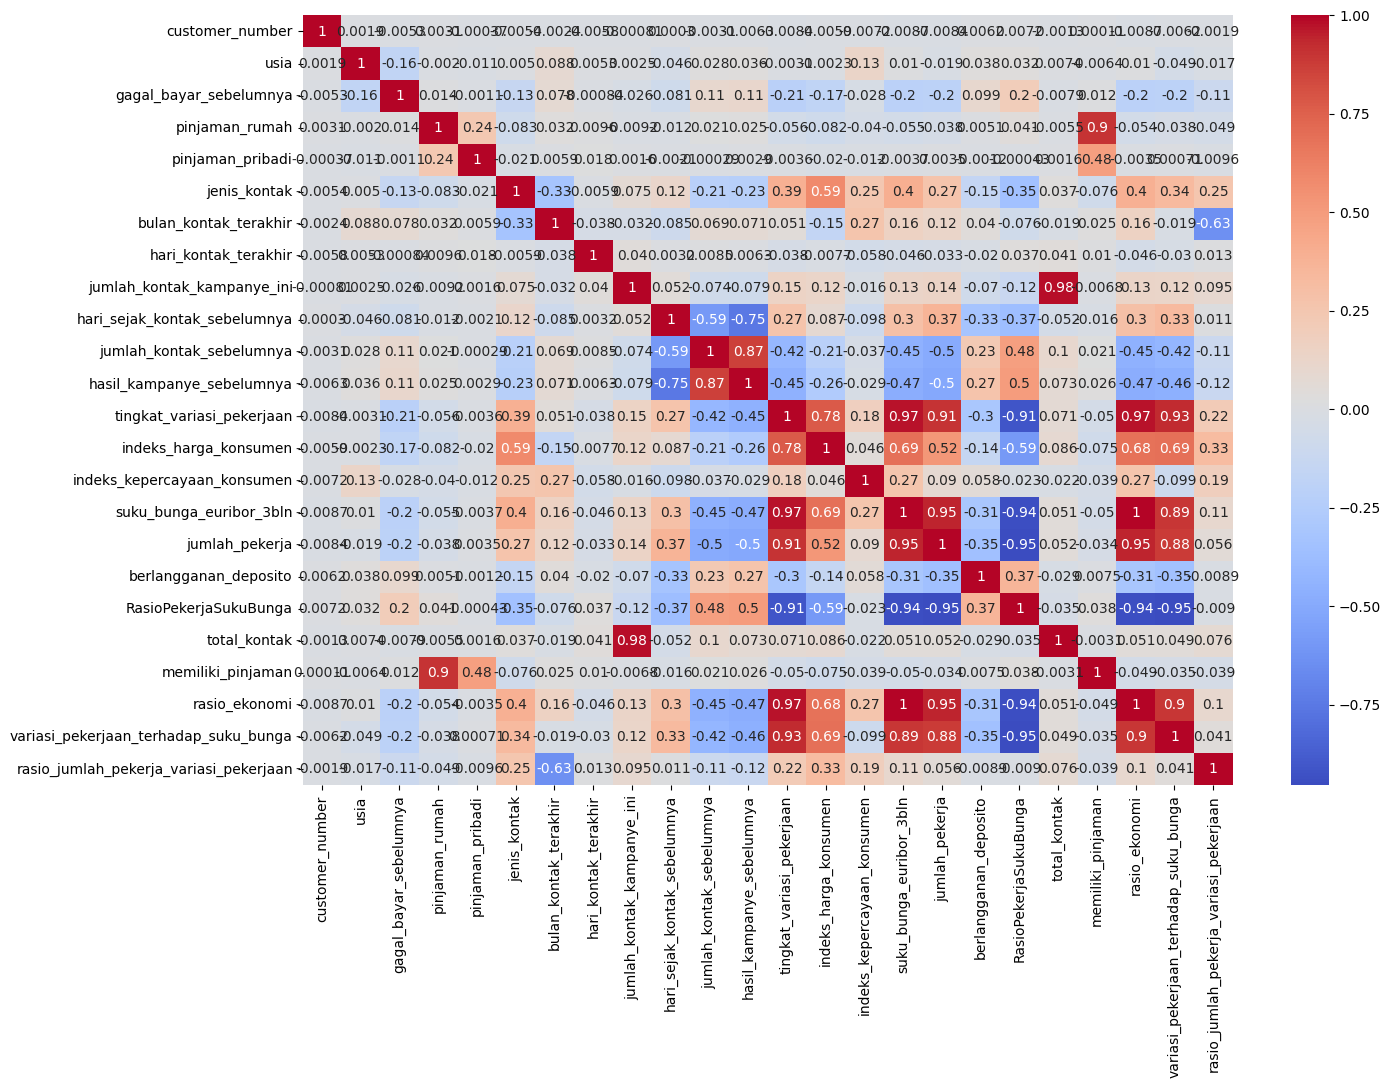

In [23]:
cc_num = cc.select_dtypes(include=np.number)
corelation_matrix = cc_num.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corelation_matrix, annot=True ,cmap='coolwarm') 

In [24]:
# # First create the correlation matrix
# correlation_matrix = cc_num.corr()

# # Convert the correlation matrix to a more manageable format
# # This will give us pairs of features and their correlation values
# correlations = []
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i+1, len(correlation_matrix.columns)):  # Start from i+1 to avoid duplicates
#         col1 = correlation_matrix.columns[i]
#         col2 = correlation_matrix.columns[j]
#         corr_value = correlation_matrix.iloc[i, j]
#         if abs(corr_value) < 0.2:  # Check for absolute correlation > 0.4
#             correlations.append({
#                 'feature1': col1,
#                 'feature2': col2,
#                 'correlation': corr_value
#             })

# # Sort by absolute correlation value and print
# correlations.sort(key=lambda x: abs(x['correlation']), reverse=True)

# print("Strong correlations (|correlation| < 0.2):")
# print("-" * 50)
# for corr in correlations:
#     print(f"{corr['feature1']} vs {corr['feature2']}: {corr['correlation']:.3f}")

# # Alternatively, if you just want the values:
# # print("\nJust correlation values < 0.2:")
# # print("-" * 50)
# # for corr in correlations:
# #     print(f"{corr['correlation']:.3f}")

In [25]:
cc_validation.info()
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_number                         5729 non-null   int64  
 1   usia                                    5729 non-null   int64  
 2   pekerjaan                               5729 non-null   object 
 3   status_perkawinan                       5729 non-null   object 
 4   pendidikan                              5729 non-null   object 
 5   gagal_bayar_sebelumnya                  5729 non-null   int64  
 6   pinjaman_rumah                          5729 non-null   int64  
 7   pinjaman_pribadi                        5729 non-null   int64  
 8   jenis_kontak                            5729 non-null   int64  
 9   bulan_kontak_terakhir                   5729 non-null   int64  
 10  hari_kontak_terakhir                    5729 non-null   int6

In [26]:
cc['pendidikan'].unique()
cc['pendidikan'] = cc['pendidikan'].map({'TIDAK SEKOLAH': 0, 'Tidak Tamat SD': 1, 'SD': 2, 'SMP': 3, 'SMA': 4, 'Diploma': 5, 'Pendidikan Tinggi': 6, 'unknown': -2})
###############################################
cc_validation['pendidikan'] = cc_validation['pendidikan'].map({'TIDAK SEKOLAH': 0, 'Tidak Tamat SD': 1, 'SD': 2, 'SMP': 3, 'SMA': 4, 'Diploma': 5, 'Pendidikan Tinggi': 6, 'unknown': -2})


In [27]:
cc.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pekerjaan          22916 non-null  object
 1   status_perkawinan  22916 non-null  object
 2   pulau              22916 non-null  object
dtypes: object(3)
memory usage: 537.2+ KB


In [28]:
cc = pd.get_dummies(cc, columns=['pekerjaan', 'status_perkawinan', 'pulau'], drop_first=True)
cc.info()
cc.head()
################################################
cc_validation = pd.get_dummies(cc_validation, columns=['pekerjaan', 'pulau'], drop_first=True)
cc_validation.info()
cc_validation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_number                         22916 non-null  int64  
 1   usia                                    22916 non-null  int64  
 2   pendidikan                              22916 non-null  int64  
 3   gagal_bayar_sebelumnya                  22916 non-null  int64  
 4   pinjaman_rumah                          22916 non-null  int64  
 5   pinjaman_pribadi                        22916 non-null  int64  
 6   jenis_kontak                            22916 non-null  int64  
 7   bulan_kontak_terakhir                   22916 non-null  int64  
 8   hari_kontak_terakhir                    22916 non-null  int64  
 9   jumlah_kontak_kampanye_ini              22916 non-null  int64  
 10  hari_sejak_kontak_sebelumnya            22916 non-null  in

,customer_number,usia,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,...,pekerjaan_sosial media specialis,pekerjaan_teknisi,pekerjaan_unknown,pulau_Jawa,pulau_Kalimantan,pulau_NTB,pulau_NTT,pulau_Papua,pulau_Sulawesi,pulau_Sumatera
0,445420,35,menikah,4,0,1,1,0,7,7,...,False,False,False,True,False,False,False,False,False,False
1,585604,52,lajang,5,-1,0,0,1,5,4,...,False,True,False,False,False,False,False,True,False,False
2,888824,37,menikah,3,-1,1,0,1,5,3,...,False,False,False,False,False,False,False,False,False,False
3,816820,51,menikah,5,0,0,0,1,5,2,...,False,False,False,False,False,False,False,False,False,True
4,542716,45,cerai,4,0,1,0,0,5,4,...,False,True,False,False,False,False,False,False,False,True


In [29]:
cc[cc.select_dtypes(include='boolean').columns] = cc.select_dtypes(include='boolean').astype(float)

In [30]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_number                         22916 non-null  int64  
 1   usia                                    22916 non-null  int64  
 2   pendidikan                              22916 non-null  int64  
 3   gagal_bayar_sebelumnya                  22916 non-null  int64  
 4   pinjaman_rumah                          22916 non-null  int64  
 5   pinjaman_pribadi                        22916 non-null  int64  
 6   jenis_kontak                            22916 non-null  int64  
 7   bulan_kontak_terakhir                   22916 non-null  int64  
 8   hari_kontak_terakhir                    22916 non-null  int64  
 9   jumlah_kontak_kampanye_ini              22916 non-null  int64  
 10  hari_sejak_kontak_sebelumnya            22916 non-null  in

# Modeling

In [31]:
from cuml.ensemble import RandomForestClassifier
from cuml.preprocessing import StandardScaler
from cuml.model_selection import train_test_split
from cuml.metrics import accuracy_score, roc_auc_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import optuna
import cudf
import cupy as cp
import sqlite3

In [32]:
storage_url = "sqlite:///optuna_study3.db"

In [33]:
# cc = cudf.DataFrame(cc)

In [34]:
X = cc.drop(columns=['berlangganan_deposito'], axis=1)
y = cc['berlangganan_deposito']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'lambda': trial.suggest_float('lambda', 0, 5),
        'alpha': trial.suggest_float('alpha', 0, 5),
    }

    model = xgb.XGBClassifier(**param, use_label_encoder=False)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    preds = model.predict_proba(X_val)[:, 1]
    auc_score = roc_auc_score(y_val, preds)
    return auc_score

study = optuna.create_study(direction='maximize', study_name='XGboost_Study',storage=storage_url, load_if_exists=True)
study.optimize(objective, n_trials = 1000)

best_params = study.best_params
print("best parameter", best_params)


best_model = xgb.XGBClassifier(**study.best_params, use_label_encoder=False)
best_model.fit(X_train, y_train)

y_pred = best_model.predict_proba(X_val)[:, 1]


auc_score = roc_auc_score(y_val, y_pred)
print(f"AUC Score: {auc_score:.4f}")

print(y_pred[:10]) 

[I 2025-05-23 16:03:58,634] A new study created in RDB with name: XGboost_Study
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:839: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:839: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
/usr/local/lib/python3.11/dist-packages/xgboost/data.py:839: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()
[I 2025-05-23 16:04:04,498] Trial 0 finished with value: 0.7889633178710938 and parameters: {'max_depth': 3, 'learning_rate': 0.2779565793703846, 'n_estimators': 134, 'subsa

best parameter {'max_depth': 10, 'learning_rate': 0.13896955485440382, 'n_estimators': 503, 'subsample': 0.9344669678473685, 'colsample_bytree': 0.5209061576025156, 'gamma': 1.666085006298792, 'lambda': 4.651193939465618, 'alpha': 3.78791499098807}
AUC Score: 0.8031
[0.11310118 0.06506175 0.11185524 0.04180219 0.05354739 0.07250641
 0.11010736 0.03657047 0.240652   0.04626568]


/usr/local/lib/python3.11/dist-packages/xgboost/data.py:839: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


In [35]:
# print(type(X_train))
# print(X_train.shape)

# print(type(X_test))
# print(X_test.shape)


In [36]:
# X_train = cc.drop(columns=['berlangganan_deposito'], axis=1)
# y_train = cc['berlangganan_deposito']
# X_validation = cc_validation

# X_train = cudf.DataFrame(X_train)
# y_train = cudf.Series(y_train)
# X_validation = cudf.DataFrame(X_validation)

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_validation = scaler.transform(X_validation)

# model = RandomForestRegressor(
#         n_estimators=100,
#         max_depth=6,
#         random_state=42,
#         bootstrap=True,
#         min_samples_split=3,
#         max_features='sqrt',
#         n_streams=1)

# model.fit(X_train, y_train)

# y_val_pred = model.predict(X_validation)

# print(y_val_pred[:10]) 

# submission = cudf.DataFrame({'customer_number': X_test['customer_number'] ,'berlangganan_deposito': y_test_np})
# submission.to_csv("random.csv", index=False)